# Lab 4: Data Visualization

**Group members:** Stephanie Anderson, Giulia Rapisardi, and Luca

**Date:** 02.24.20

### Questions:

1. Use the visualization tools presented in this slide set to look at the data set. Are your independent variables uni- or multimodal? Can you identify clusters when performing scatter plots? Are those clusters related to your decision tree model? What about the different levels of your dependent variable - are they equally represented?

>Within our dataset, the price of keebler (price.kleebler) and the price of nabisco (price.nabisco) were both bimodal variables. All other price variables were unimodal (**Figure 1**). All of the display (disp.) and feature (feat.) independent variables are also bimodal due to their boolean nature (0 or 1). From our cluster analyses, it appears people typically selected nabisco products when prices were comparibly lower than other brands (**Figure 2**). No other trends could be discerned from the cluster analysis. Our decision tree did not mirror these results, as entropy was primarily reduced based on the price of private brands and the price of keebler (price.private and price.kleebler, respectively). Some disagreement between the cluster analysis and the decision tree may be due to the levels of our independent variable (choice) being unequally represented within the dataset. Of the levels, 'Nabisco' is the most represented, followed by 'private' (**Figures 3 & 4**).

2. Find the simplest decision tree model whose accuracy is at least 80% of the accuracy of the best model you built in the previous assignment. E.g. if you best model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75. How does the best decision tree model from your last assignment and your new, simplified model compare in terms of interpretability? Do they agree on the major trends/classifications? Can you relate the decision tree of the simplified model to clusters you have discovered in the previous part of this assignment?

>Our previous model had a depth of 21 and an accuracy score of 86%. Our simplified model has a depth of 2 and an accuracy of 68%. The simplified model is far more interpretable than the original model due to its lower depth. However, despite these differences in depth, both models agree on the first two levels of sorting, decreasing entropy based on the price of private brands (price.private) followed by the price of keebler (price.kleebler). After the first two levels, the models no longer agree, sorting based on differing factors. An illustration depicting the first two levels of sorting are depicted in **Figure 5**. There, the data that is addressed in each level of the decision tree is marked by bounds.


In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Crackers.csv')
df.head()

,id,disp.sunshine,disp.kleebler,disp.nabisco,disp.private,feat.sunshine,feat.kleebler,feat.nabisco,feat.private,price.sunshine,price.kleebler,price.nabisco,price.private,choice
0,1,0,0,0,0,0,0,0,0,98.000002,88.0,120.000000,70.999998,nabisco
1,1,0,0,0,0,0,0,0,0,99.000001,109.0,99.000001,70.999998,nabisco
2,1,1,0,0,0,0,0,0,0,49.000001,109.0,109.000000,77.999997,sunshine
3,1,0,0,0,0,0,0,0,0,103.000000,109.0,88.999999,77.999997,nabisco
4,1,0,0,0,0,0,0,0,0,109.000000,109.0,119.000010,63.999999,nabisco


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1163fcbe0>,
      dtype=object)

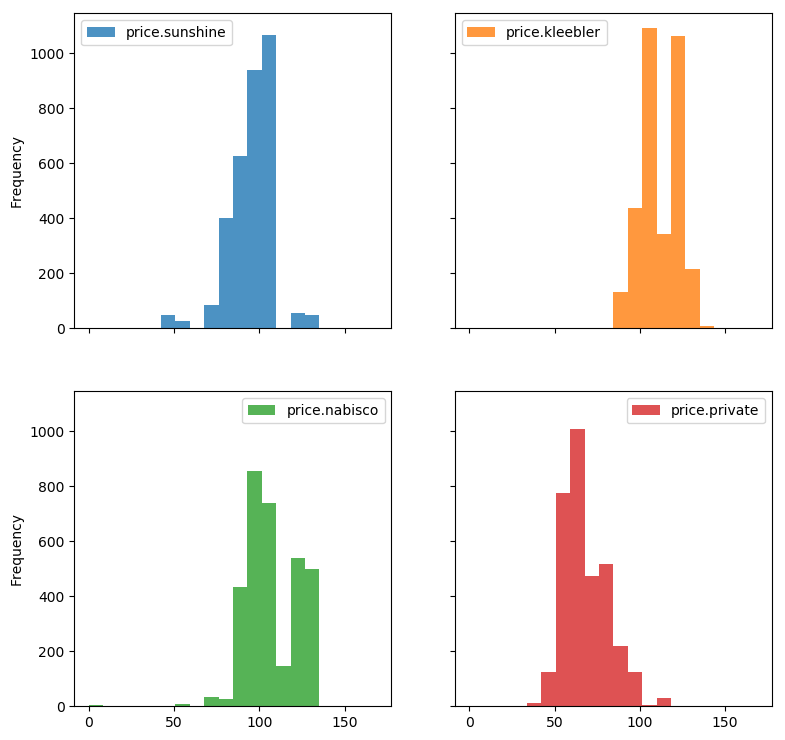

In [4]:
mpl.style.use('default')
df.loc[:,'price.sunshine':'price.private'].plot.hist(bins=20, alpha=0.8, figsize=(9, 9), 
                                                     subplots=True, layout=(2, 2), sharey=True)

**Figure 1**: Histograms for each independent variable within the dataset. Colors and subplots depict the price distribution of each cracker brand.

In [35]:
import seaborn as sns

In [75]:
#sns.pairplot(df, height=3, vars=["price.sunshine", "price.kleebler", "price.nabisco","price.private"])

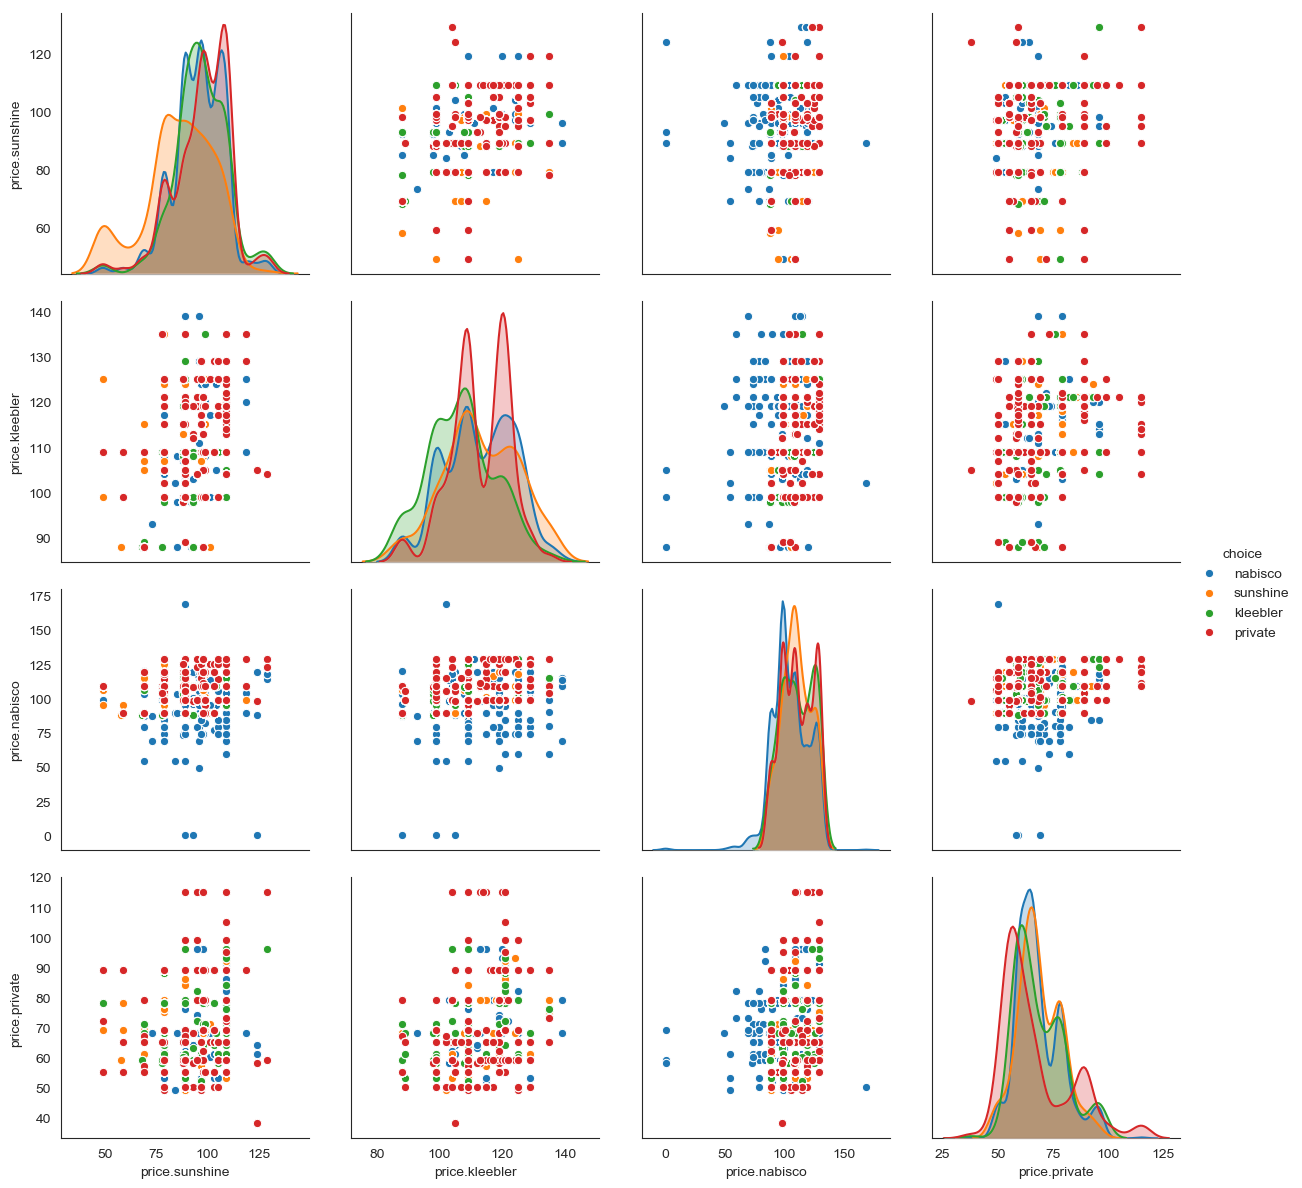

In [6]:
sns.set_style("white")
sns.pairplot(df, hue="choice",height=3, vars=["price.sunshine", "price.kleebler", "price.nabisco","price.private"])

**Figure 2**: Pair plot of cracker brand price distributions. Colors characterize the cracker brand choice made by consumers. Density distributions of each selection are also shown (diagonal).

In [76]:
#sns.jointplot(x="price.sunshine", y="price.kleebler", data=df, height=6)

In [77]:
#sns.jointplot(x="price.sunshine", y="price.kleebler", data=df, height=6, kind="kde", color="b")

Text(0, 0.5, 'Count')

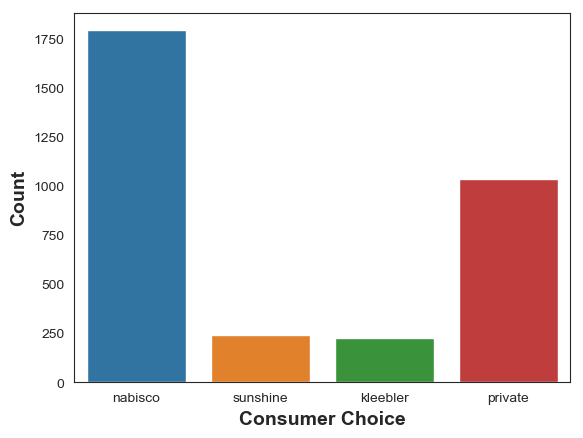

In [7]:
sns.set_style("white")
sns.countplot(df.loc[:,'choice'])
plot.xlabel('Consumer Choice', fontweight='bold', fontsize='14')
plot.ylabel('Count', fontweight='bold', fontsize='14')

**Figure 3:** Occurance of consumer cracker brand choices.

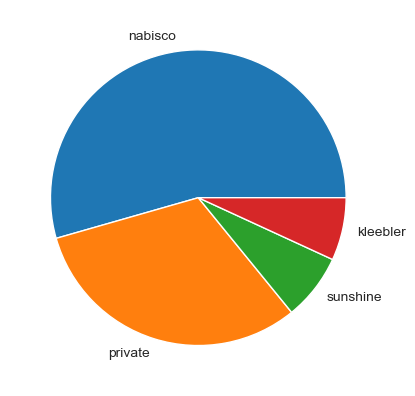

In [8]:
plot_series = df.loc[:,'choice'].rename('')
plot_series.value_counts().plot.pie()

**Figure 4**: Consumer choice breakdown.

### Assessing the differences between a simplified and a complex decision tree.
 
##### Simplified Tree
Accuracy score: 68%

In [9]:
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [10]:
# get rid of the id column 
df.drop(['id'], axis=1, inplace = True)
# Create a features column
features_df = df.drop(['choice'],axis=1)
features_df.head()

,disp.sunshine,disp.kleebler,disp.nabisco,disp.private,feat.sunshine,feat.kleebler,feat.nabisco,feat.private,price.sunshine,price.kleebler,price.nabisco,price.private
0,0,0,0,0,0,0,0,0,98.000002,88.0,120.000000,70.999998
1,0,0,0,0,0,0,0,0,99.000001,109.0,99.000001,70.999998
2,1,0,0,0,0,0,0,0,49.000001,109.0,109.000000,77.999997
3,0,0,0,0,0,0,0,0,103.000000,109.0,88.999999,77.999997
4,0,0,0,0,0,0,0,0,109.000000,109.0,119.000010,63.999999


In [14]:
target_df = pd.DataFrame(df['choice'])
target_df.head()

,choice
0,nabisco
1,nabisco
2,sunshine
3,nabisco
4,nabisco


In [15]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
tree_print(dtree,features_df)

if price.private =< 59.5: 
  |then if price.kleebler =< 103.5: 
  |  |then nabisco
  |  |else private
  |else if price.private =< 88.5: 
  |  |then nabisco
  |  |else private
<---->
Tree Depth:  2


In [21]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['choice']           # name the column - same name as in target!

print("Our simplified model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our simplified model accuracy is: 0.68681652490887


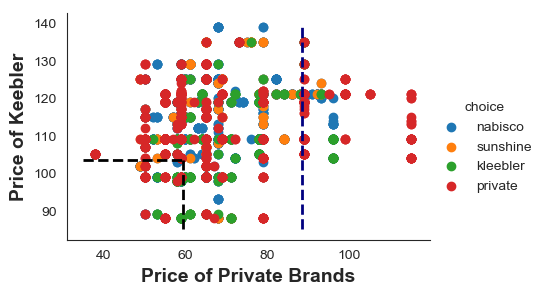

In [77]:
fg = sns.FacetGrid(data=df, hue='choice', aspect=1.5)
g = fg.map(plot.scatter, 'price.private', 'price.kleebler').add_legend()
plot.xlabel('Price of Private Brands', fontweight='bold', fontsize='14')
plot.ylabel('Price of Keebler', fontweight='bold', fontsize='14')
plot.plot([35, 59.5], [103.5, 103.5], linewidth=2, color='black', ls='--')
plot.plot([59.5, 59.5], [85, 103.5], linewidth=2, color='black', ls='--')
plot.plot([88.5, 88.5], [85, 140], linewidth=2, color='navy', ls='--')

**Figure 5**: Illustration of simplified decision tree sorting algorithm. The model first reduces entropy by sorting choices that fall within the black box (price.private =< 59.5 & price.kleebler =< 103.5). The next level of sorting occurs based on the price of private brands (blue line, price.private =< 88.5).

##### Complex tree
Accuracy score: 86%

In [18]:
# original model
dtree_best = tree.DecisionTreeClassifier(criterion='entropy')
dtree_best.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
tree_print(dtree_best,features_df)

if price.private =< 59.5: 
  |then if price.kleebler =< 103.5: 
  |  |then if price.private =< 56.49999809265137: 
  |  |  |then if price.private =< 53.99999809265137: 
  |  |  |  |then if price.private =< 51.49999809265137: 
  |  |  |  |  |then if price.private =< 49.5: 
  |  |  |  |  |  |then if price.sunshine =< 81.5: 
  |  |  |  |  |  |  |then sunshine
  |  |  |  |  |  |  |else if disp.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |else if disp.sunshine =< 0.5: 
  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |else if price.nabisco =< 97.0: 
  |  |  |  |  |  |  |then if disp.sunshine =< 0.5: 
  |  |  |  |  |  |  |  |then if disp.kleebler =< 0.5: 
  |  |  |  |  |  |  |  |  |then if price.kleebler =< 100.5: 
  |  |  |  |  |  |  |  |  |  |then if disp.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |then if price.nabisco =< 84.0: 
  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |else if price.nabisco =< 99.0: 
  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |else kleebler
  |  |  |  |  |  |  |  |  |else if disp.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |  |  |then if price.private =< 60.50000190734863: 
  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |else kleebler
  |  |  |  |  |  |  |  |  |  |else kleebler
  |  |  |  |  |  |  |else kleebler
  |  |  |  |  |  |else if price.nabisco =< 120.0: 
  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |else if price.private =< 60.50000190734863: 
  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |else kleebler
  |  |  |  |  |else if price.private =< 60.50000190734863: 
  |  |  |  |  |  |then if price.nabisco =< 120.0: 
  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |else if feat.sunshine =< 0.5: 
  |  |  |  |  |  |  |then if price.sunshine =< 84.0: 
  |  |  |  |  |  |  |  |then nabi

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |else if price.nabisco =< 107.49999618530273: 
  |  |  |  |  |  |  |  |  |  |  |  |then sunshine
  |  |  |  |  |  |  |  |  |  |  |  |else if price.private =< 66.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then if price.kleebler =< 103.00000381469727: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |then sunshine
  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if disp.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if feat.sunshine =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then sunshine
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |else if price.nabisco =< 121.00000381469727: 
  |  |  |  |  |  |  |  |then if feat.sunsh

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else private
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if feat.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if disp.private =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if disp.private =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |else private
  |  |  |  |  |  |  |  |  |  |  |  |else if feat.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then if disp.nabisco =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |then private
  |  |  |  |  |  |  |  |  |  |  |  |  |  |else priva

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if price.sunshine =< 102.0: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |else nabisco
  |  |  |  |  |  |  |  |  |  |  |else if price.private =< 74.0: 
  |  |  |  |  |  |  |  |  |  |  |  |then if price.private =< 71.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then kleebler
  |  |  |  |  |  |  |  |  |  |  |  |  |else private
  |  |  |  |  |  |  |  |  |  |  |  |else if price.nabisco =< 124.00000381469727: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then if price.sunshine =< 104.0: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if price.private =< 77.0: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then nabisco
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if price.sunshine =< 94.0: 
  |  |  |  |  |  |  |  |  |  |  | 

In [20]:
predict_bestarray = dtree_best.predict(features_df)      
predicted_bestlabels = pd.DataFrame(predict_bestarray)  
predicted_bestlabels.columns = ['choice']           

print("Our original model accuracy is: {}".format(accuracy_score(target_df, predicted_bestlabels)))

Our original model accuracy is: 0.8642162818955043
